In [2]:
from pathlib import Path

import pandas as pd
import geopandas as gpd
import shapely.geometry as sg
import folium
#import spectra


DATA_DIR = Path('../data')
OUT_DIR = Path('../output')

%matplotlib inline

# What are Auckland's crashiest roads?

Use open data and GeoPandas to find out

## Download data

1. Auckland road geodata from Mapzen at https://s3.amazonaws.com/metro-extracts.mapzen.com/auckland_new-zealand.imposm-geojson.zip
2. NZ crash data from NZTA at http://www.nzta.govt.nz/safety/safety-resources/road-safety-information-and-tools/disaggregated-crash-data/ 

## Filter crash data to last five years and write to separate, smaller file

In [6]:
path = DATA_DIR/'disaggregated-crash-data.csv'
f = pd.read_csv(path)
f = f[f['CRASH_YEAR'] >= 2012].copy()

path = DATA_DIR/'nz_crashes_2012--2017.csv'
f.to_csv(path, index=False)

/home/araichev/.virtualenvs/introducing_geopandas-7e0rFXCM/lib/python3.5/site-packages/IPython/core/interactiveshell.py:2728: DtypeWarning: Columns (21,40) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


## Explore data

In [7]:
# Load Auckland roads as GeoDataFrame

path = DATA_DIR/'auckland_new-zealand_roads_gen1.geojson'  # 50 m tolerance
roads = gpd.read_file(str(path))
roads['osm_id'] = roads['osm_id'].astype(int).astype(str)
roads.head()

,osm_id,type,name,tunnel,bridge,oneway,ref,z_order,access,service,class,geometry
0,4077500,primary,Neilson Street,0,0,0,,6.0,,,highway,LINESTRING (174.7825679460168 -36.926756607184...
1,4077501,primary,Church Street,0,0,0,10,6.0,,,highway,LINESTRING (174.8133010321928 -36.920145632513...
2,4279302,secondary,Grafton Bridge,0,0,0,,5.0,yes,,highway,LINESTRING (174.7635943347171 -36.858437809893...
3,4279724,secondary,Victoria Street West,0,0,0,,5.0,,,highway,LINESTRING (174.7511958235428 -36.848174756190...
4,4279727,secondary,Hobson Street,0,0,1,,5.0,,,highway,LINESTRING (174.763198038335 -36.8445056618951...


In [8]:
# Reproject to NZTM 

print(roads.crs)
CRS_WGS84 = roads.crs
roads = roads.to_crs(epsg=2193)

print(roads.crs)
CRS_NZTM = roads.crs
roads.head()

{'init': 'epsg:4326'}
{'init': 'epsg:2193', 'no_defs': True}


,osm_id,type,name,tunnel,bridge,oneway,ref,z_order,access,service,class,geometry
0,4077500,primary,Neilson Street,0,0,0,,6.0,,,highway,LINESTRING (1758765.076053659 5911768.63763862...
1,4077501,primary,Church Street,0,0,0,10,6.0,,,highway,LINESTRING (1761516.533885194 5912450.48134130...
2,4279302,secondary,Grafton Bridge,0,0,0,,5.0,yes,,highway,LINESTRING (1757215.13659337 5919379.770159338...
3,4279724,secondary,Victoria Street West,0,0,0,,5.0,,,highway,LINESTRING (1756130.656319006 5920538.74984815...
4,4279727,secondary,Hobson Street,0,0,1,,5.0,,,highway,LINESTRING (1757208.342740773 5920926.12962173...


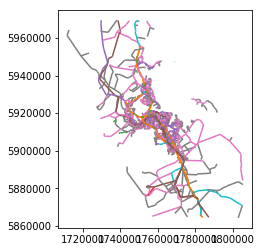

In [9]:
# Plot

roads.plot(column='type')

In [10]:
# Load NZ crash data as DataFrame

path = DATA_DIR/'nz_crashes_2012--2017.csv'
crashes = pd.read_csv(path)
crashes.head().T

/home/araichev/.virtualenvs/introducing_geopandas-7e0rFXCM/lib/python3.5/site-packages/IPython/core/interactiveshell.py:2728: DtypeWarning: Columns (21,34,40) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,0,1,2,3,4
CRASH_YEAR,2012,2012,2012,2012,2012
CRASH_FIN_YEAR,2011/2012,2011/2012,2011/2012,2011/2012,2011/2012
CRASH_SEV,F,F,F,F,F
FATAL_COUNT,1,1,1,1,1
SERIOUSINJ_COUNT,0,0,0,0,0
MINORINJ_COUNT,0,2,1,0,0
MULTI_VEH,Vehicle(s)+Pedestrian(s),Multi vehicle,Vehicle(s)+Cyclist(s) only,Vehicle(s)+Pedestrian(s),Single vehicle
HOLIDAY,Christmas/New Year,None,None,None,None
LG_REGION_DESC,Auckland,Auckland,Bay of Plenty,Auckland,Northland
TLA_ID,7,7,23,7,1


In [15]:
# Get Auckland crashes and drop bad locations

f = crashes.copy()
cond = f['LG_REGION_DESC'].str.contains('Auckland')
cond &= (f['EASTING'] > 0) & (f['NORTHING'] > 0)
#cond &= f['MULTI_VEH'].str.contains(r'cyclist|pedestrian', case=False)
f = f[cond].copy()
f.T



,0,1,3,9,11,14,15,18,21,23,...,188713,188714,188717,188718,188720,188722,188728,188730,188731,188732
CRASH_YEAR,2012,2012,2012,2012,2012,2012,2012,2012,2012,2012,...,2017,2017,2017,2017,2017,2017,2017,2017,2017,2017
CRASH_FIN_YEAR,2011/2012,2011/2012,2011/2012,2011/2012,2011/2012,2011/2012,2011/2012,2011/2012,2011/2012,2011/2012,...,2017/2018,2016/2017,2016/2017,2016/2017,2017/2018,2017/2018,2017/2018,2017/2018,2017/2018,2017/2018
CRASH_SEV,F,F,F,F,F,F,F,F,F,F,...,N,N,N,N,N,N,N,N,N,N
FATAL_COUNT,1,1,1,1,1,1,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0
SERIOUSINJ_COUNT,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
MINORINJ_COUNT,0,2,0,4,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
MULTI_VEH,Vehicle(s)+Pedestrian(s),Multi vehicle,Vehicle(s)+Pedestrian(s),Single vehicle,Vehicle(s)+Pedestrian(s),Multi vehicle,Single vehicle,Single vehicle,Multi vehicle,Vehicle(s)+Pedestrian(s),...,Multi vehicle,Multi vehicle,Single vehicle,Multi vehicle,Multi vehicle,Single vehicle,Single vehicle,Multi vehicle,Multi vehicle,Multi vehicle
HOLIDAY,Christmas/New Year,None,None,None,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
LG_REGION_DESC,Auckland,Auckland,Auckland,Auckland,Auckland,Auckland,Auckland,Auckland,Auckland,Auckland,...,Auckland,Auckland,Auckland,Auckland,Auckland,Auckland,Auckland,Auckland,Auckland,Auckland
TLA_ID,7,7,7,7,7,7,7,7,7,7,...,7,7,7,7,7,7,7,7,7,7


In [17]:
# Convert to GeoDataFrame in NZTM

geometry = [sg.Point(p) for p in zip(f['EASTING'], f['NORTHING'])]
crashes = gpd.GeoDataFrame(f, crs=CRS_NZTM, geometry=geometry)
print(crashes.crs)
crashes.T

{'init': 'epsg:2193', 'no_defs': True}


,0,1,3,9,11,14,15,18,21,23,...,188713,188714,188717,188718,188720,188722,188728,188730,188731,188732
CRASH_YEAR,2012,2012,2012,2012,2012,2012,2012,2012,2012,2012,...,2017,2017,2017,2017,2017,2017,2017,2017,2017,2017
CRASH_FIN_YEAR,2011/2012,2011/2012,2011/2012,2011/2012,2011/2012,2011/2012,2011/2012,2011/2012,2011/2012,2011/2012,...,2017/2018,2016/2017,2016/2017,2016/2017,2017/2018,2017/2018,2017/2018,2017/2018,2017/2018,2017/2018
CRASH_SEV,F,F,F,F,F,F,F,F,F,F,...,N,N,N,N,N,N,N,N,N,N
FATAL_COUNT,1,1,1,1,1,1,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0
SERIOUSINJ_COUNT,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
MINORINJ_COUNT,0,2,0,4,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
MULTI_VEH,Vehicle(s)+Pedestrian(s),Multi vehicle,Vehicle(s)+Pedestrian(s),Single vehicle,Vehicle(s)+Pedestrian(s),Multi vehicle,Single vehicle,Single vehicle,Multi vehicle,Vehicle(s)+Pedestrian(s),...,Multi vehicle,Multi vehicle,Single vehicle,Multi vehicle,Multi vehicle,Single vehicle,Single vehicle,Multi vehicle,Multi vehicle,Multi vehicle
HOLIDAY,Christmas/New Year,None,None,None,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
LG_REGION_DESC,Auckland,Auckland,Auckland,Auckland,Auckland,Auckland,Auckland,Auckland,Auckland,Auckland,...,Auckland,Auckland,Auckland,Auckland,Auckland,Auckland,Auckland,Auckland,Auckland,Auckland
TLA_ID,7,7,7,7,7,7,7,7,7,7,...,7,7,7,7,7,7,7,7,7,7


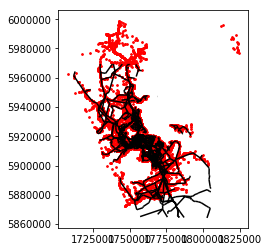

In [18]:
# Plot crashes on roads

base = roads.plot(color='black')
crashes.plot(ax=base, marker='o', color='red', markersize=3)

## Address our question

In [ ]:
# Spatial-join roads and buffered crash points

r = roads[['geometry', 'osm_id', 'name', 'class']].copy()
c = crashes[['geometry', 'CRASH_SEV']].copy()
c['geometry'] = c['geometry'].buffer(10)
f = gpd.sjoin(r, c, how='inner', op='intersects')
f

In [ ]:
oid = '100761816'
f[f['osm_id'] == oid]

In [ ]:
# Assign crash scores to roads

f['#crashes'] = 1

g = f.groupby('osm_id').agg({
    'geometry': 'first', 
    'name': 'first', 
    '#crashes': 'sum',
#    'num_crashes_weighted': 'sum',
    }).reset_index()

g = gpd.GeoDataFrame(g, crs=CRS_NZTM)  # Lost the geodataframe during the groupby
g['length_m'] = g['geometry'].length
g['#crashes/m'] = g['#crashes']/g['length_m']
g = g.sort_values('#crashes/m', ascending=False)
crashy_roads = g.copy()
g

# Problem 6

In [ ]:
# Color-code roads by number of crashes.
# Use Spectra for the coloring.

r = crashy_roads.round(3).sort_values('#crashes/m')
r = gpd.GeoDataFrame(r, crs=CRS_NZTM)  # Lost the geodataframe during rounding

# Color
print(r.describe())
cuts = [0] + [r['#crashes/m'].quantile(k/100) for k in [25, 50, 75, 98, 100]]

colors = reversed(['#d7191c', '#d7191c','#fdae61','#ffffbf','#abdda4','#2b83ba'])
scale = spectra.scale(colors).colorspace('lch').domain(cuts)
r['stroke'] = r['#crashes/m'].map(
  lambda x: scale(x).hexcode)

# Thickness
r['stroke-width'] = 10

# Export to GeoJSON and plot in geojsonio for a closer look
path = OUT_DIR/'auckland_crashy_roads.geojson'
geo = r.to_crs(CRS_WGS84).to_json()
with path.open('w') as tgt:
    tgt.write(geo)
    
# path = OUT_DIR/'auckland_crashes.geojson'
# geo = crashes[['geometry', 'CRASH_SEV']].to_crs(CRS_WGS84).to_json()
# with path.open('w') as tgt:
#     tgt.write(geo)


